In [45]:
import pandas as pd
import numpy as np
import scipy as sc
import sklearn as skl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [46]:
train = pd.read_csv("./data/criminal_train.csv")

In [53]:
header = list(train)
feature_col = header[0:len(header)-1]

In [54]:
X = train[feature_col]
y = train['Criminal']
X = X[X.columns.difference(['PERID'])]

In [55]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

### Liner regression approach

In [56]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [57]:
y_pred = logReg.predict(X_test)

In [58]:
from sklearn import metrics

In [59]:
print(metrics.accuracy_score(y_test,y_pred))

0.930774278215


### KNN approach

In [60]:
# n = 7
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test,y_pred))

0.928313648294


In [61]:
# finding best n for knn
# in range n = 1 ~ 25
n_range = range(1,26)
score = []
for n in n_range:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    score.append(metrics.accuracy_score(y_test,y_pred))

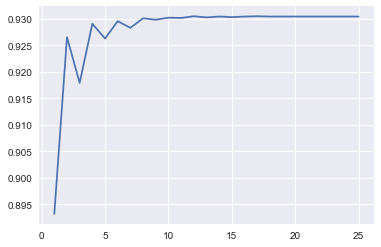

In [62]:
plt.plot(n_range,score)
# tried with n upto 230 and max acuracy was 93

## training on full data

In [80]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7)
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=7, p=2,
           weights='uniform')

In [83]:
test = pd.read_csv("./data/criminal_test.csv")

In [84]:
result = knn.predict(test)

In [109]:
mydf = list(zip(test['PERID'],result))

In [110]:
mydf = pd.DataFrame(data=mydf,columns=['PERID','Criminal'])

In [113]:
mydf.to_csv('./data/sample_submission.csv',index=False)

6
